# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities:

In [1]:
#Dependencies and Setup:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

#Import the OpenWeatherMap API key:
from api_keys import weather_api_key

#Import citipy to determine the cities based on latitude and longitude:
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library:

In [2]:
#Empty list for holding the latitude and longitude combinations:
lat_lngs = []

#Empty list for holding the cities names
cities = []

#Range of latitudes and longitudes:
lat_range = (-90, 90)
lng_range = (-180, 180)

#Create a set of random lat and lng combinations:
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

#Identify nearest city for each lat, lng combination:
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    #If the city is unique, then add it to a our cities list:
    if city not in cities:
        cities.append(city)

#Print the city count to confirm sufficient count:
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 593


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude:

### ~ Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code ~

In [3]:
#Set the API base URL:
url = "https://api.openweathermap.org/data/2.5/weather?q="

#Define an empty list to fetch the weather data for each city:
city_data = []

#Print to logger:
print("Beginning Data Retrieval     ")
print("-----------------------------")

#Create counters:
record_count = 1
set_count = 1
        
#Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    #Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
        
    #Create endpoint URL with each city:
    city_url = url + city + "&appid=" + weather_api_key + "&units="
    
    #Log the url, record, and set numbers:
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    #Add 1 to the record count:
    record_count += 1

    #Run an API request for each of the cities:
    try:
        #Parse the JSON and retrieve data:
        city_weather = requests.get(city_url).json()

        #Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date:
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]['country']
        city_date = city_weather["dt"]

        #Append the City information into city_data list:
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    #If an error is experienced, skip the city:
    except:
        print("City not found. Skipping...")
        pass
              
#Indicate that Data Loading is complete: 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hawaiian paradise park
Processing Record 2 of Set 1 | pisco
Processing Record 3 of Set 1 | puerto natales
Processing Record 4 of Set 1 | invercargill
Processing Record 5 of Set 1 | sandnessjoen
Processing Record 6 of Set 1 | albany
Processing Record 7 of Set 1 | mount pearl
Processing Record 8 of Set 1 | patong
Processing Record 9 of Set 1 | pamandzi
Processing Record 10 of Set 1 | souillac
Processing Record 11 of Set 1 | blackmans bay
Processing Record 12 of Set 1 | narrabri
Processing Record 13 of Set 1 | puerto ayora
Processing Record 14 of Set 1 | whitehorse
Processing Record 15 of Set 1 | bredasdorp
Processing Record 16 of Set 1 | adamstown
Processing Record 17 of Set 1 | nyeri
Processing Record 18 of Set 1 | iskateley
Processing Record 19 of Set 1 | tungao
Processing Record 20 of Set 1 | port alfred
Processing Record 21 of Set 1 | rongelap
Processing Record 22 of Set 1 | hithadhoo
Processin

Processing Record 37 of Set 4 | yangambi
Processing Record 38 of Set 4 | pacific grove
Processing Record 39 of Set 4 | santa marta
Processing Record 40 of Set 4 | badamdar
Processing Record 41 of Set 4 | novodvinsk
Processing Record 42 of Set 4 | margaret river
Processing Record 43 of Set 4 | hastings
Processing Record 44 of Set 4 | yamada
Processing Record 45 of Set 4 | guiuan
Processing Record 46 of Set 4 | lu-uk
Processing Record 47 of Set 4 | yinchuan
Processing Record 48 of Set 4 | alofi
Processing Record 49 of Set 4 | howrah
Processing Record 0 of Set 5 | parnarama
Processing Record 1 of Set 5 | buta
Processing Record 2 of Set 5 | sabang
Processing Record 3 of Set 5 | axim
Processing Record 4 of Set 5 | dubbo
Processing Record 5 of Set 5 | villa emilio carranza
Processing Record 6 of Set 5 | niigata
Processing Record 7 of Set 5 | tamanrasset
Processing Record 8 of Set 5 | talnakh
Processing Record 9 of Set 5 | severo-yeniseyskiy
Processing Record 10 of Set 5 | tranovaho
City not 

Processing Record 26 of Set 8 | dahlonega
Processing Record 27 of Set 8 | palmer
Processing Record 28 of Set 8 | christchurch
Processing Record 29 of Set 8 | kenai
Processing Record 30 of Set 8 | lagos
Processing Record 31 of Set 8 | griffith
Processing Record 32 of Set 8 | laguna
Processing Record 33 of Set 8 | silver springs
Processing Record 34 of Set 8 | dazhou
Processing Record 35 of Set 8 | fuvahmulah
City not found. Skipping...
Processing Record 36 of Set 8 | hammerfest
Processing Record 37 of Set 8 | hayma'
City not found. Skipping...
Processing Record 38 of Set 8 | bonito
Processing Record 39 of Set 8 | santa luzia
Processing Record 40 of Set 8 | klyuchi
Processing Record 41 of Set 8 | bam
Processing Record 42 of Set 8 | remire-montjoly
Processing Record 43 of Set 8 | ad dabbah
Processing Record 44 of Set 8 | panguipulli
Processing Record 45 of Set 8 | le port
Processing Record 46 of Set 8 | berdigestyakh
Processing Record 47 of Set 8 | itamaraca
Processing Record 48 of Set 8 

Processing Record 17 of Set 12 | mogoytuy
Processing Record 18 of Set 12 | kharan
Processing Record 19 of Set 12 | borzya
Processing Record 20 of Set 12 | phang nga
Processing Record 21 of Set 12 | rakops
Processing Record 22 of Set 12 | rosso
Processing Record 23 of Set 12 | torrington
Processing Record 24 of Set 12 | qarazhal
Processing Record 25 of Set 12 | alto araguaia
Processing Record 26 of Set 12 | dnipro
Processing Record 27 of Set 12 | benguela
Processing Record 28 of Set 12 | darnah
Processing Record 29 of Set 12 | krasnovishersk
Processing Record 30 of Set 12 | flin flon
Processing Record 31 of Set 12 | horta
Processing Record 32 of Set 12 | revda
Processing Record 33 of Set 12 | galle
Processing Record 34 of Set 12 | al muwayh
Processing Record 35 of Set 12 | ketchikan
Processing Record 36 of Set 12 | caspe
Processing Record 37 of Set 12 | whittlesea
Processing Record 38 of Set 12 | ponnani
Processing Record 39 of Set 12 | margate
Processing Record 40 of Set 12 | kawthoung

In [4]:
#Convert the cities weather data into a Pandas DataFrame:
city_data_df = pd.DataFrame(city_data)

#Show Record Count:
city_data_df.count()

City          565
Lat           565
Lng           565
Max Temp      565
Humidity      565
Cloudiness    565
Wind Speed    565
Country       565
Date          565
dtype: int64

In [5]:
#Display sample data:
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hawaiian paradise park,19.5933,-154.9731,300.88,82,100,4.12,US,1690159199
1,pisco,-13.7000,-76.2167,294.18,68,100,5.14,PE,1690159204
2,puerto natales,-51.7236,-72.4875,268.94,92,15,1.49,CL,1690159205
3,invercargill,-46.4000,168.3500,282.98,88,96,0.11,NZ,1690159205
4,sandnessjoen,66.0217,12.6316,284.44,95,100,1.40,NO,1690159205


In [6]:
#Export the City_Data into a csv:
city_data_df.to_csv("Output_Data/cities.csv", index_label="City_ID")

In [7]:
#Read saved data:
city_data_df = pd.read_csv("Output_Data/cities.csv", index_col="City_ID")

#Display sample data:
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hawaiian paradise park,19.5933,-154.9731,300.88,82,100,4.12,US,1690159199
1,pisco,-13.7000,-76.2167,294.18,68,100,5.14,PE,1690159204
2,puerto natales,-51.7236,-72.4875,268.94,92,15,1.49,CL,1690159205
3,invercargill,-46.4000,168.3500,282.98,88,96,0.11,NZ,1690159205
4,sandnessjoen,66.0217,12.6316,284.44,95,100,1.40,NO,1690159205


### Create the Scatter Plots Requested:

#### Latitude vs. Temperature

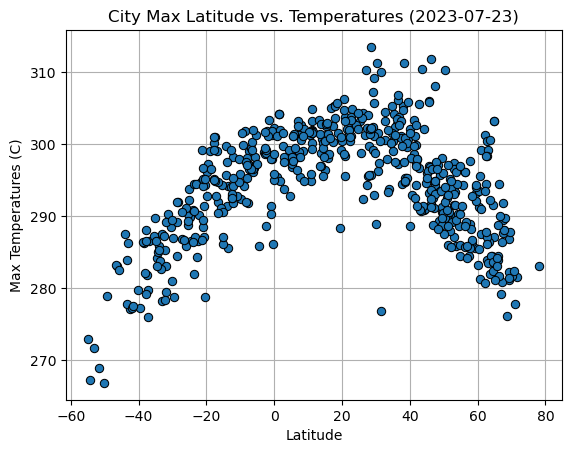

In [8]:
#Build scatter plot for latitude vs. Temperature:
plt.plot(city_data_df["Lat"],
         city_data_df["Max Temp"],
         linestyle = "none",
         marker="o",
         markeredgecolor="black",
         markeredgewidth=0.75)

# Incorporate the other graph properties:
plt.xlabel("Latitude")
plt.ylabel("Max Temperatures (C)")
plt.title("City Max Latitude vs. Temperatures (2023-07-23)")
plt.grid()

# Save the figure:
plt.savefig("output_data/LatitudevTemperaturePlot.png")

# Show plot:
plt.show()

#### Latitude vs. Humidity

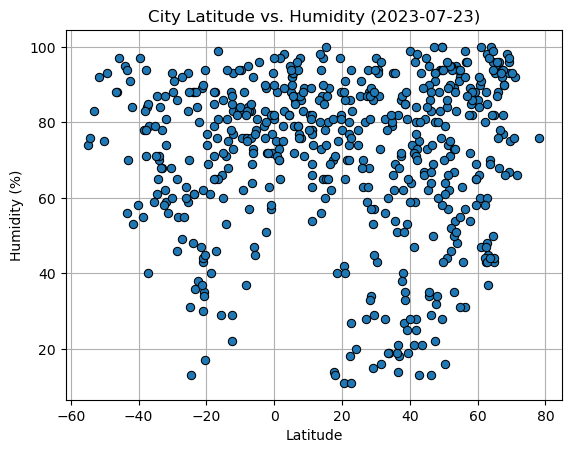

In [9]:
#Build the scatter plots for latitude vs. Humidity:
plt.plot(city_data_df["Lat"],
         city_data_df["Humidity"],
         linestyle = "none",
         marker="o",
         markeredgecolor="black",
         markeredgewidth=0.75)

#Incorporate the other graph properties:
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (2023-07-23)")
plt.grid()

#Save the figure:
plt.savefig("output_data/LatitudevHumidityPlot.png")

#Show plot:
plt.show()

#### Latitude vs. Cloudiness

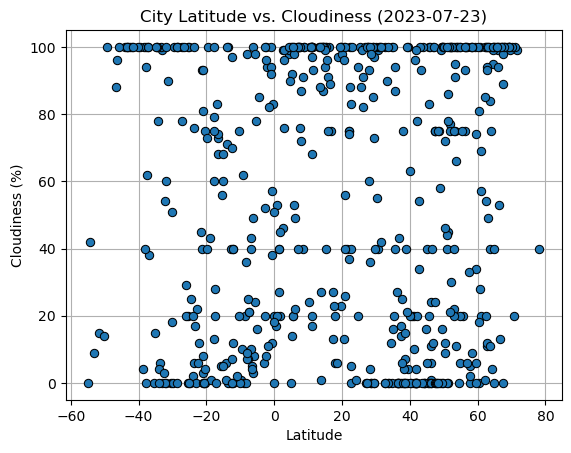

In [10]:
#Build the scatter plots for latitude vs. Cloudiness:
plt.plot(city_data_df["Lat"], 
         city_data_df["Cloudiness"], 
         linestyle="none", 
         marker="o", 
         markeredgecolor="black", 
         markeredgewidth=0.75)
        
#Incorporate the other graph properties:
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (2023-07-23)")
plt.grid()

#Save the figure:
plt.savefig("output_data/LatitudevCloudinessPlot.png")

#Show plot:
plt.show()

#### Latitude vs. Wind Speed Plot

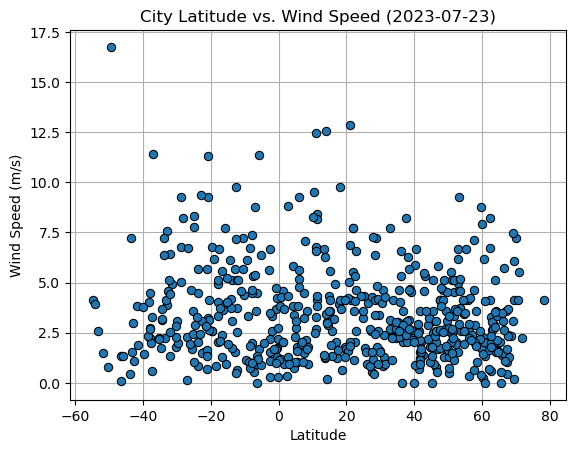

In [11]:
#Build the scatter plots for latitude vs. Wind Speed:
plt.plot(city_data_df["Lat"], 
         city_data_df["Wind Speed"], 
         linestyle="none", 
         marker="o", 
         markeredgecolor="black", 
         markeredgewidth=0.75)
        
#Incorporate the other graph properties:
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed (2023-07-23)")
plt.grid()

#Save the figure:
plt.savefig("output_data/LatitudevWindSpeedPlot.png")

#Show plot:
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship:


In [12]:
#Define a function to create Linear Regression plots:
def linear_regression(x_values, y_values, x_c=.1, y_c=.9):
    slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq, xy=(x_c, y_c), xycoords='axes fraction', fontsize=15,color="pink")
    plt.xlabel ("Latitude")
    plt.ylabel (y_values.name)
    print(f"The r-value is: {rvalue**2}")
    
#Show plot:
    plt.show()

In [13]:
#Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemis_df = city_data_df[city_data_df["Lat"] >= 0]

#Display sample data
northern_hemis_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hawaiian paradise park,19.5933,-154.9731,300.88,82,100,4.12,US,1690159199
4,sandnessjoen,66.0217,12.6316,284.44,95,100,1.40,NO,1690159205
5,albany,42.6001,-73.9662,296.61,75,54,1.40,US,1690159205
6,mount pearl,47.5166,-52.7813,294.34,91,75,4.12,CA,1690159206
7,patong,7.8961,98.2966,302.60,76,72,7.09,TH,1690159206


In [14]:
#Create a DataFrame with the Southern Hemisphere data (Latitude < 0):
southern_hemis_df = city_data_df[city_data_df["Lat"] < 0]

#Display sample data:
southern_hemis_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,pisco,-13.7000,-76.2167,294.18,68,100,5.14,PE,1690159204
2,puerto natales,-51.7236,-72.4875,268.94,92,15,1.49,CL,1690159205
3,invercargill,-46.4000,168.3500,282.98,88,96,0.11,NZ,1690159205
8,pamandzi,-12.7967,45.2794,294.03,88,0,1.54,YT,1690159206
9,souillac,-20.5167,57.5167,294.36,94,75,4.12,MU,1690159206


###  Temperature vs. Latitude Linear Regression Plot:

The r-value is: 0.3969023385820292


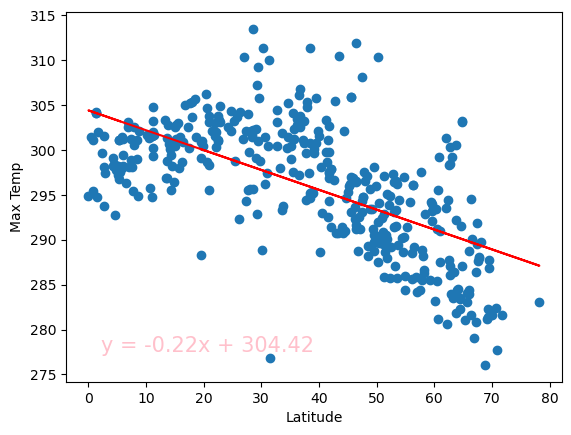

In [15]:
#Linear regression on Northern Hemisphere:
x_values = northern_hemis_df["Lat"]
y_values = northern_hemis_df["Max Temp"]
        
#Print linear regression formula:
linear_regression(x_values, y_values, 0.07, 0.08)

The r-value is: 0.6782645835212491


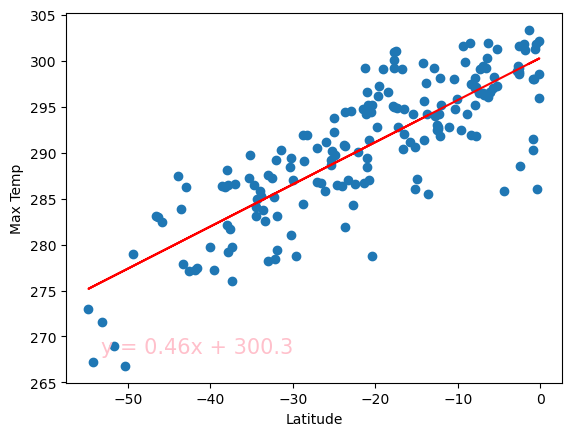

In [16]:
#Linear regression on Southern Hemisphere:
x_values = southern_hemis_df["Lat"]
y_values = southern_hemis_df["Max Temp"]

#Print linear regression formula:
linear_regression(x_values, y_values, 0.07, 0.08)

**Discussion about the linear relationship**: Temperature

~ Northern Hemisphere Observations:
There is a negative correlation between max temperatures and latitude. (some outliers are present on graph).
The r-value is ~ 0.37 (rounded up).
Max temperature drops as the latitude increases.

~ Southern Hemisphere Observations:
There is a strong positive correlation between max temperatures and latitude.
The r-value is ~ 0.67 (rounded down)
Max temperature increases as the latitude decreases.

### Humidity vs. Latitude Linear Regression Plot:

The r-value is: 0.0011291264746595491


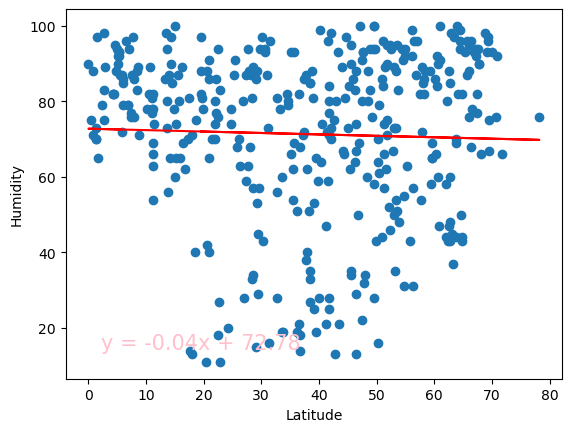

In [17]:
#Northern Hemisphere:
x_values = northern_hemis_df["Lat"]
y_values = northern_hemis_df["Humidity"]

#Print linear regression formula:
linear_regression(x_values, y_values, 0.07, 0.08)

The r-value is: 9.787930562383439e-05


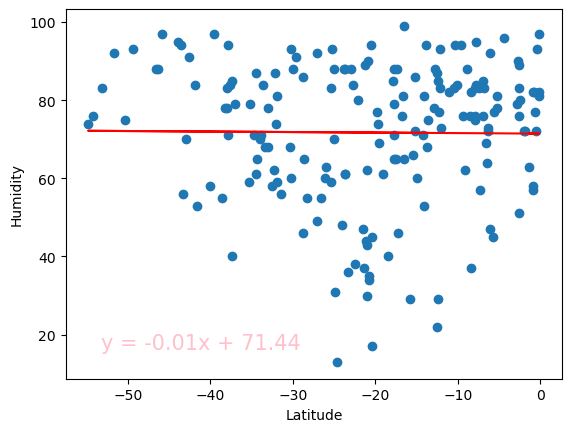

In [18]:
# Southern Hemisphere:
x_values = southern_hemis_df["Lat"]
y_values = southern_hemis_df["Humidity"]

#Print linear regression formula:
linear_regression(x_values, y_values, 0.07, 0.08)

**Discussion about the linear relationship**: Humidity

~ Northern Hemisphere Observations:
There is no correlation between Humidity and Latitude.
The r-value is ~ 0.0

~ Southern Hemisphere Observations: 
There is no correlation between Humidity and Latitude.
The r-value is ~ 9.8 (rounded up)

### Cloudiness vs. Latitude Linear Regression Plot:

The r-value is: 0.0020743343614391613


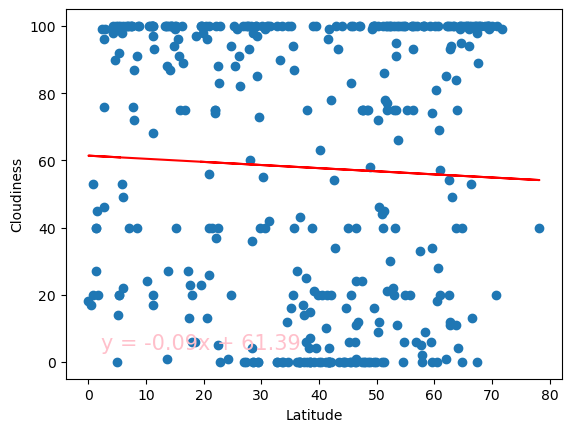

In [23]:
#Northern Hemisphere:
x_values = northern_hemis_df["Lat"]
y_values = northern_hemis_df["Cloudiness"]

#Print linear regression formula:
linear_regression(x_values, y_values, 0.07, 0.08)

The r-value is: 0.03236829680848391


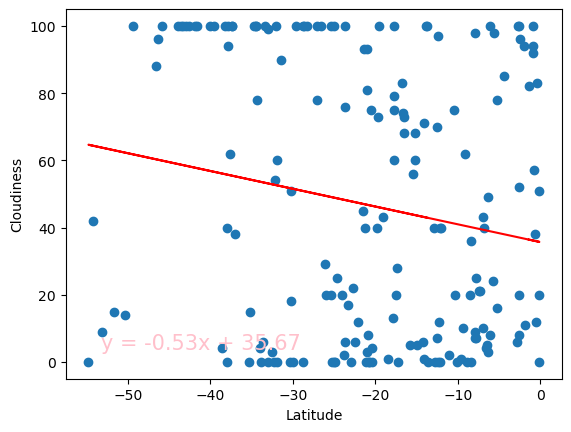

In [20]:
#Southern Hemisphere:
x_values = southern_hemis_df["Lat"]
y_values = southern_hemis_df["Cloudiness"]

#Print linear regression formula:
linear_regression(x_values, y_values, 0.07, 0.08)

**Discussion about the linear relationship**: Cloudiness

~ Northern Hemisphere Observations:
There is no correlation between Cloudliness and Latitude.
The r-value is ~ 0.00

~ Southern Hemisphere Observations:
There is no correlation between Cloudliness and Latitude.
The r-value is ~ 0.03 (rounded down)

### Wind Speed vs. Latitude Linear Regression Plot:

The r-value is: 0.012970586367784552


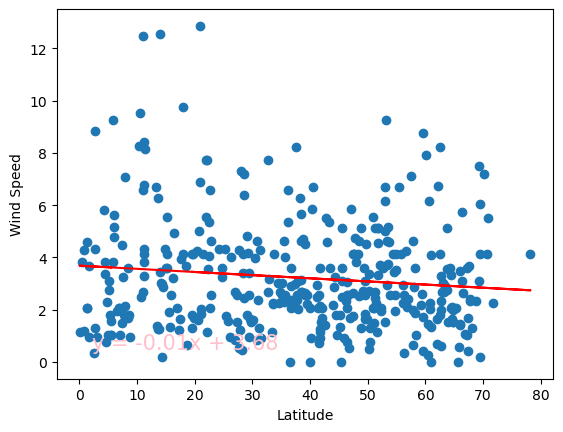

In [21]:
#Northern Hemisphere:
x_values = northern_hemis_df["Lat"]
y_values = northern_hemis_df["Wind Speed"]

#Print linear regression formula:
linear_regression(x_values, y_values, 0.07, 0.08)

The r-value is: 0.002088014518663573


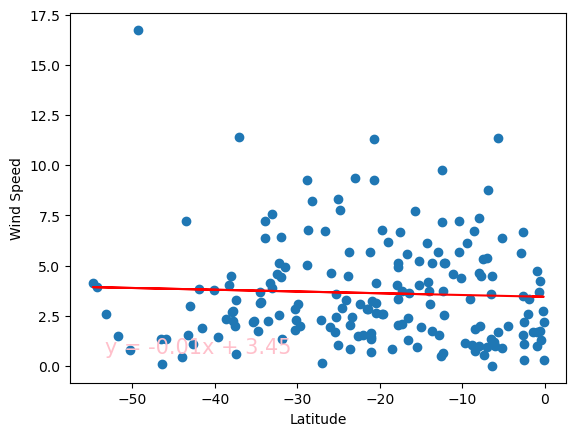

In [22]:
#Southern Hemisphere:
x_values = southern_hemis_df["Lat"]
y_values = southern_hemis_df["Wind Speed"]

#Print linear regression formula:
linear_regression(x_values, y_values, 0.07, 0.08)

**Discussion about the linear relationship**: Wind Speed

~ Northern Hemisphere Observations:
There is no correlation between Wind Speed and Latitude.
The r-value is ~ 0.01 (rounded down)

~ Southern Hemisphere Observations:
There is no correlation between Wind Speed and Latitude.
The r-value is ~ 0.00